In [2]:
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


This corresponds to trying to optimise an unknown machine learning model. However, the initialization of the model is very important, meaning your observations will be very noisy, and the problem might have a lot of local optima! You are trying to make the model’s log-likelihood as large as possible.

In [3]:
X = np.load('../initial_data/function_2/initial_inputs.npy')
Y = np.load('../initial_data/function_2/initial_outputs.npy')

## Random Search

In [5]:
next_query = np.random.uniform(size=2)
print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

next_query: 0.495665-0.013563


## Upper Confidence Bound

In [6]:
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# use gridsearch to optimise the acquisition function
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        X_grid.append([x1[i], x2[j]])

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std=True)
ucb = mean + 1.96 * std

print(f"ucb: {ucb}")
print(f"mean: {mean}")
print(f"std: {std}")

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

ucb: [-1.62941594 -1.62551654 -1.6187959  ...  1.85291018  1.93755015
  2.02704494]
mean: [-1.71134082 -1.70480819 -1.69548552 ...  1.82998124  1.91299143
  2.00075276]
std: [0.04179841 0.04045492 0.03912735 ... 0.01169844 0.01252996 0.01341438]
next_query: 0.000000-1.000000


## Visualising the data

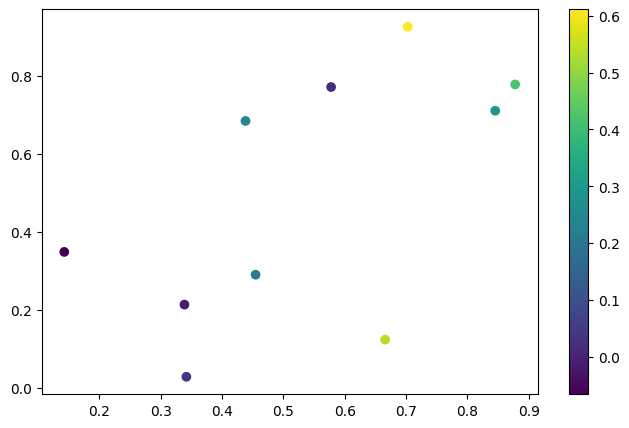

In [7]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.colorbar()